In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Missing data
Missing data occurs when values are simply absent or contain NaN (not a number) for any feature (column) in a given dataset. This will cause issues with many machine learning algorithms.
    
**Missing data can negatively impact:**
- Data visualization
- Arithemetic computations
- Machine learning algorithms 

**Common methods to deal with missing data:**
- Remove rows or columns containing missing data
- Impute with mean or median
- Impute with mide (most frequently occuring feature)
- Impute with forward or backward fill
- Interpolate data between two points

*Note: Domain knowledge is often needed to deide how to fill nulls*

In [2]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])
df = df[df > 0]
df

,A,B,C,D
0,NaN,1.148903,NaN,NaN
1,0.656314,0.361729,0.550628,NaN
2,0.583379,0.278862,NaN,0.188553
3,NaN,0.511401,0.665607,1.345865
4,NaN,NaN,2.265588,0.214301
5,1.059949,NaN,1.792069,NaN
6,0.490142,NaN,0.165171,NaN
7,NaN,NaN,0.571278,0.249931
8,0.177948,NaN,1.216372,0.920182
9,1.009402,0.491551,NaN,0.023520


## dropna
remove rows (default), or columns, containing null.

**Parameters**
- **how** = "any" (default), or "all"
- **thresh** = set number of (non-missing) values a row must contain in order to *not* drop
- **subset** only look for NaN in subset of columns (or rows)
- **axis** = "index" (default), or "columns"

In [17]:
copy = df
copy.dropna(axis="columns", subset=0)

,B
0,1.148903
1,0.361729
2,0.278862
3,0.511401
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,0.491551


## Fillna
- Fill missing values

In [24]:
copy = df.copy()
copy["A"].fillna(copy["A"].median(), inplace=True)
# copy["B].mode()[0] # Mainly for categorical data
copy["B"].ffill(inplace=True)
copy["D"].bfill(inplace=True)
copy["C"].interpolate()
copy

,A,B,C,D
0,0.619847,1.148903,NaN,0.188553
1,0.656314,0.361729,0.550628,0.188553
2,0.583379,0.278862,NaN,0.188553
3,0.619847,0.511401,0.665607,1.345865
4,0.619847,0.511401,2.265588,0.214301
5,1.059949,0.511401,1.792069,0.249931
6,0.490142,0.511401,0.165171,0.249931
7,0.619847,0.511401,0.571278,0.249931
8,0.177948,0.511401,1.216372,0.920182
9,1.009402,0.491551,NaN,0.023520


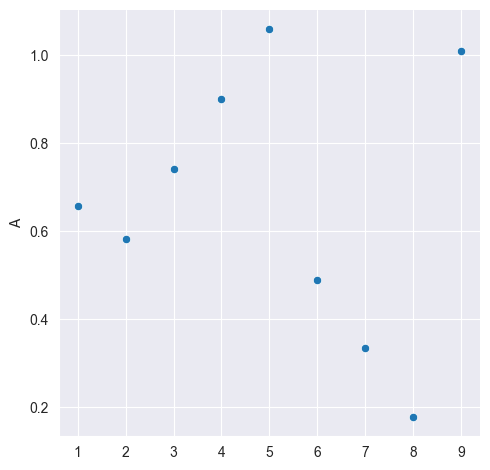

In [27]:
copy = df.copy()
copy["Isnull"] = copy["A"].isna()
copy["A"].interpolate(inplace=True)
sns.relplot(x=copy.index, y="A", data=copy)